<a href="https://colab.research.google.com/github/monicasjsu/Machine_Learning/blob/main/1_GMM_Monica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
import seaborn as sns
import collections
from matplotlib.patches import Ellipse
from google.colab import drive

# If not working, Please download the file from 
# https://drive.google.com/file/d/1N5VFdouP1bQAPmF5R9mcbWmrXLp2EvfC/view?usp=sharing
# and place it in your google drive at the following location
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/Shared drives/SheCodes/HR_Employee_Attrition.csv",sep=',')

df.info()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField    

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# Check the description of the dataset.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Check value_counts and remove any columns with singular values
single_cols = []
for col in df.columns:
    if len(df[col].unique())==1:
        print(col)
        single_cols.append(col)

EmployeeCount
Over18
StandardHours


In [ ]:
# Now lets drop the columns
df.drop(single_cols, axis=1, inplace=True)
# Now lets check the cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

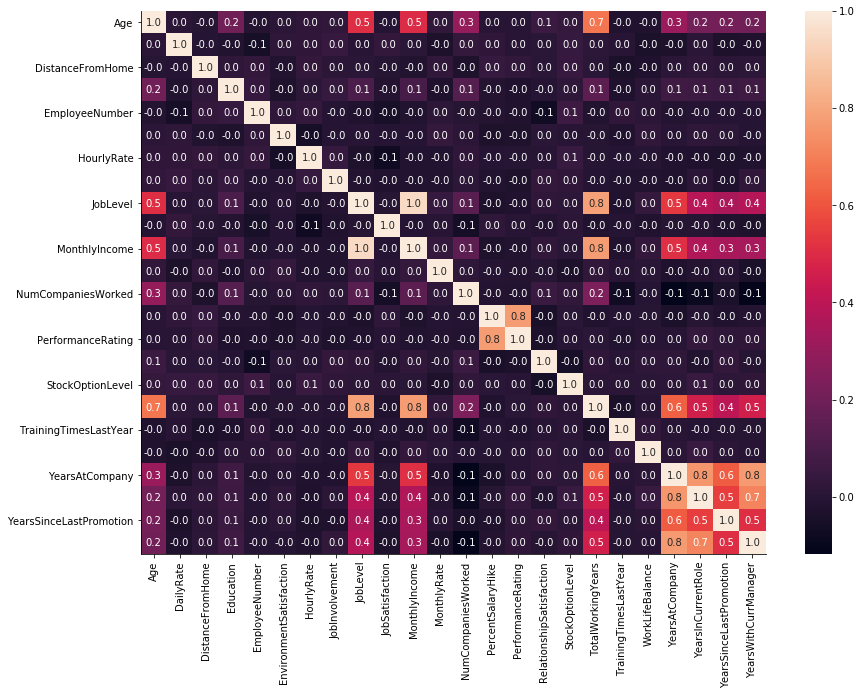

In [ ]:
# correlation plot to know which attributes show highest correlation
corr = df.corr()
g = sns.heatmap(corr, annot=True, fmt='.1f')
sns.despine()
g.figure.set_size_inches(14, 10)
plt.show()

In [ ]:
# Change the Object type to categorical types, so that they can be converted to Integer
# using cat.codes
for col in ['BusinessTravel', 'Gender', 'JobRole', 'OverTime', 'EducationField', 'Department', 'MaritalStatus']:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [ ]:
# Check the dataset types and column count again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null int8
DailyRate                   1470 non-null int64
Department                  1470 non-null int8
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int8
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int8
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int8
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int8
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 n

In [ ]:
y = df['Attrition']
X = df.drop(['Attrition'], axis=1)

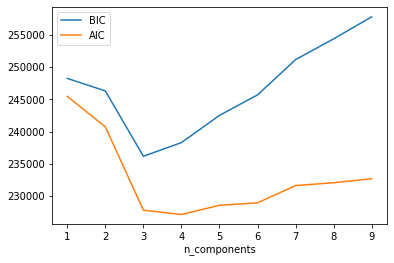

In [ ]:
# AIC and BIC to calculate the best n_components
import numpy as np

n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

For n_clusters = 2 The average silhouette_score is : 0.10638947941701013
For n_clusters = 3 The average silhouette_score is : -0.02115852917372659
For n_clusters = 4 The average silhouette_score is : -0.03872397058374724
For n_clusters = 5 The average silhouette_score is : -0.2446561543051496
For n_clusters = 6 The average silhouette_score is : -0.23414951282157426
For n_clusters = 7 The average silhouette_score is : -0.2280930163710341
For n_clusters = 8 The average silhouette_score is : -0.28429901395065693
For n_clusters = 9 The average silhouette_score is : -0.2851836942640166


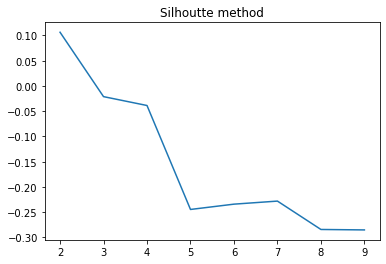

In [ ]:
silhouette_avg =[]
for i in range(2, 10):
    gmm = GaussianMixture(n_components = i, covariance_type='full', random_state=0).fit(X)
    gmm_predict = gmm.fit_predict(X)
    avg = silhouette_score(X, gmm_predict)
    silhouette_avg.append(avg)
    print("For n_clusters =", i,
          "The average silhouette_score is :", avg)

import matplotlib.pyplot as plt
plt.plot(range(2, 10), silhouette_avg)
plt.title('Silhoutte method')
plt.show()

As we can see from the above silhouette method, cluster has the maximum score of 0.1 
which is better than other clusters. Though, we need to note that that 0.1 is not as good as the number of clusters that gives
the score of 1. 

However, AIC and BIC scores are low when n_components is 3, which is more accurate in our scenario 

In [ ]:
gmm = GaussianMixture(n_components=3, covariance_type = 'full', random_state=0)
y_gmm = gmm.fit_predict(X)
df['cluster'] = y_gmm
probs = pd.DataFrame(gmm.predict_proba(X))

def isOutlier(x):
    return x[0] <= 0.5 and x[1] <= 0.5
        
df['isOutlier'] = probs.apply(isOutlier, axis=1)

collections.Counter(y_gmm)

Counter({0: 1140, 1: 182, 2: 148})

In [ ]:
# Now lets calculate the percentage of employee attrition for each cluster.
def attrition_percentage(x):
    print("Cluster {}".format(x['cluster'].iloc[0]))
    value_counts = x['Attrition'].value_counts()
    print (value_counts)
    attr_per = 100 * (value_counts[1]/float(value_counts[0] + value_counts[1]))
    print("Attrition percentage {}".format(attr_per))
    
df.groupby(by=['cluster']).apply(attrition_percentage)

Cluster 0
No     954
Yes    186
Name: Attrition, dtype: int64
Attrition percentage 16.315789473684212
Cluster 1
No     147
Yes     35
Name: Attrition, dtype: int64
Attrition percentage 19.230769230769234
Cluster 2
No     132
Yes     16
Name: Attrition, dtype: int64
Attrition percentage 10.81081081081081


""


As we can see above, cluster 0 has 1140, cluster 1 has 147 and cluster 3 has 148 employees.
Attrition rate in cluster 0 is 16%, in cluster 1 is 19% and in cluster 2 it is 11%.

We can notice that the clustering is not evenly distributed. Cluster 0 has 78% of the total employees
while cluster 1 has 12.3% and cluster 2 has 10%. 

In [ ]:
# Outliers were detected by checking the probabilities of being in any cluster less than 70%
df['isOutlier'].value_counts()
    

False    1322
True      148
Name: isOutlier, dtype: int64

So, the number of outliers are equal to 148

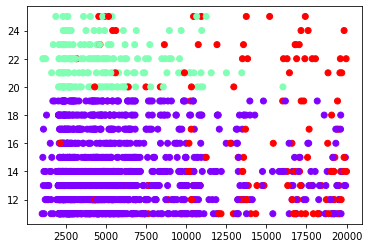

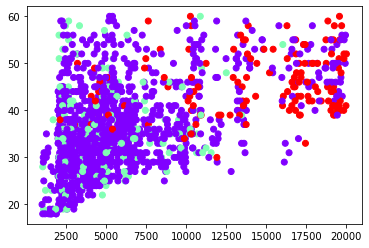

In [ ]:
# utility method to annotate labels on (x,y) points on the 2d plane.
def annotate_and_show_plot(x, y):
    for x1, y1 in zip(x, y):
        plt.annotate("", xy=(x1, y1), xytext=(-3, 3), textcoords='offset points', ha='right')
    plt.show()

# Lets try to plot 2 features from the dataset with cluster labels, 
# just for visualization purposes. I am choosing 
x1 = df['MonthlyIncome']
x2 = df['PercentSalaryHike']

plt.figure()
plt.scatter(x1, x2, c= y_gmm, cmap='rainbow')
annotate_and_show_plot(x1, x2)

x3 = df['MonthlyIncome']
x4 = df['Age']

plt.figure()
plt.scatter(x3, x4,c = y_gmm, cmap='rainbow')
annotate_and_show_plot(x1, x2)

# By plotting the relation between current monthly income and percent salary hike,
# it is clear from the plot that most of the employees with salary less than 10000 are in a
# violet cluster

# By plotting the relation between current monthly income and Age,
# we can deduce that that employees with salary greater less 10000 are 
# also younger that other employees in red cluster.
